In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# create df for training
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


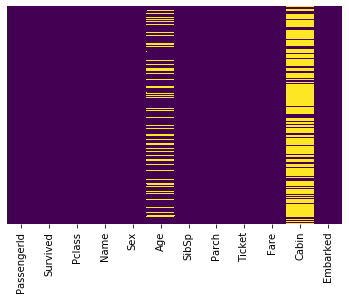

In [21]:
# EDA - seaborn to check the missing data in df
# train.isnull() - will give True/False in dataframe..
sns.heatmap(train.isnull(),yticklabels = False, cbar= False,cmap='viridis')

# every yellow point stands for True value i.e. Null value.

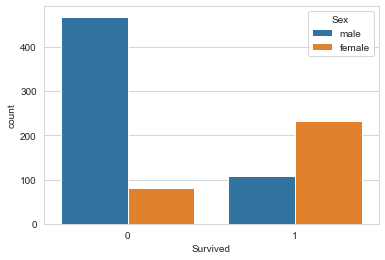

In [24]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Sex')    # 1 is surived; 0 is not survived

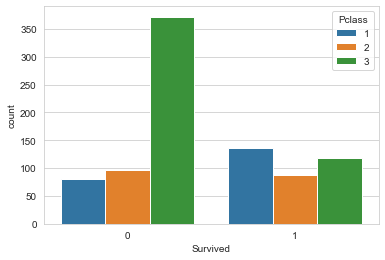

In [25]:
sns.countplot(data=train,x='Survived',hue='Pclass')  

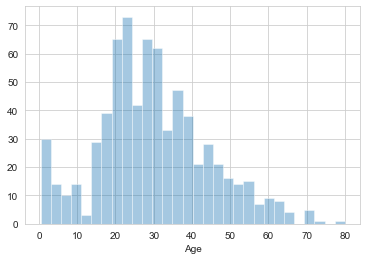

In [31]:
# check the age of the people
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [36]:
#train['Age'].plot(kind='hist',bins=30)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


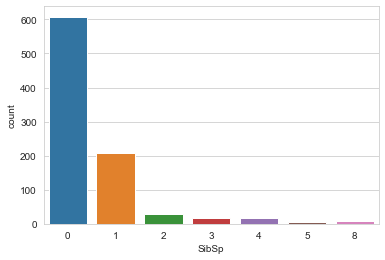

In [40]:
# sibling or spouse : train['SibSp'] 
sns.countplot(data=train,x='SibSp')

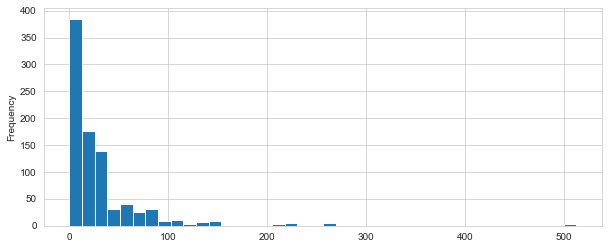

In [42]:
# Check the fare
train['Fare'].plot(kind='hist',bins=40,figsize = (10,4))

---

## Cleaning the data for NA

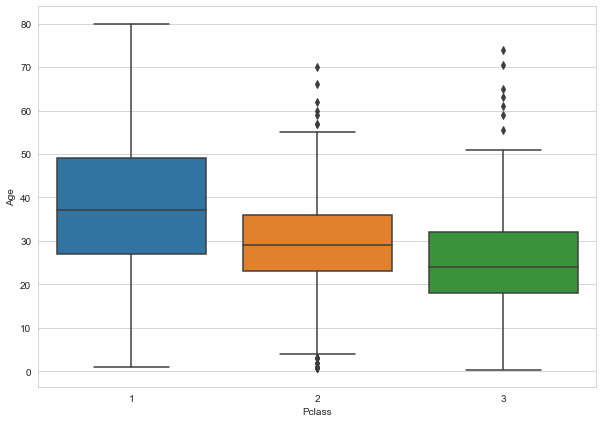

In [63]:
# check the mean age based on the Passenger class
plt.figure(figsize=(10,7))
sns.boxplot(data=train,x='Pclass',y='Age')

In [87]:
age_Pclass = train.groupby(by='Pclass').mean()['Age']

In [91]:
age_Pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [93]:
# function to impute the age for records where it is NULL.

def impute_age(colns):
    Age    = colns[0]
    Pclass = colns[1]
    
    if pd.isnull(Age):
        return age_Pclass.loc[Pclass]
    else:
        return Age

In [96]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

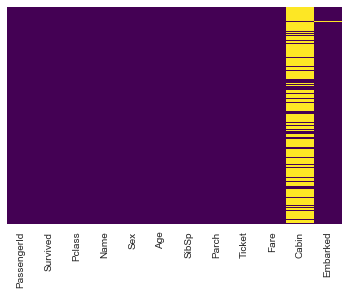

In [103]:
# now check the heatmap again
sns.heatmap(train.isnull(),yticklabels = False,cbar=False,cmap='viridis')

In [104]:
# Since cabin colum has lots of NULL values, so we can drop this column
train.drop('Cabin',axis=1,inplace=True)

In [105]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [106]:
# now drop any NULL values from the df, moreover, only 1 NULL value is there
train.dropna(inplace=True)

In [108]:
#sns.heatmap(train.isnull(),yticklabels = False,cbar=False,cmap='viridis')

In [113]:
# creating dummy columns for categorical columns: sex, embarked
# Convert categorical variable into dummy/indicator variables.
sex = pd.get_dummies(train['Sex'],drop_first=True)

# it only has only columnl value 1 means Male & 0 means Female

In [117]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [118]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [121]:
## Concat the above columns to our dataframe
train = pd.concat([train,sex,embark],axis=1)

In [124]:
train.head(3)  # it has 3 new columns : male, Q, S

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [130]:
# For ML lets drop the columns which it'll not understand
#train.drop(['Name','Sex','Ticket','Embarked'],inplace=True,axis=1)
# above was exeuted & commented later

In [131]:
train.drop('PassengerId',axis=1,inplace=True)

In [132]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


--- 
Create the model and split the train dataframe

In [137]:
# Split the features
X = train[['Pclass','Age','SibSp','Fare','male','Q','S']]

In [139]:
# label - which we want to predict
y = train['Survived']

In [127]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3, random_state=101)

In [141]:
# Create model on the training data...
from sklearn.linear_model import LogisticRegression

In [142]:
#Create an instance of logistic regression model
logmodel = LogisticRegression()

In [143]:
# fit the model..
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--- 
Get the predictions

In [145]:
predictions = logmodel.predict(X_test)

In [153]:
# check the metrices: (Accuracy,errors) of the model
from sklearn.metrics import classification_report

In [154]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.71      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [155]:
# or can import confusion matrix
from sklearn.metrics import confusion_matrix

In [156]:
confusion_matrix(y_test,predictions)
# TN  FN
# FP  TP

array([[149,  14],
       [ 30,  74]], dtype=int64)